# Import the datasets

The following steps will be taken to wrangle the data:
- 1 Import the datasets into a Jupyter Notebook
- 2 Check for missing values
- 3 Feature engineering 
- 4 Decide on what attribute will be analysed
- 5 Set the final cleaned dataset with the required features and target values

### 1. Import the datasets into a Jupyter Notebook

In [1]:
#import libraries and datasets

import pandas as pd # used to store datasets in a dataframe
import seaborn as sns # used to visualise the data
import matplotlib.pyplot as plt # used to visualise the data
import numpy as np # used to transform the data into arrays

#opel datasets with added columns for car type and dataset

opel_corsa_01 = pd.read_csv("ml_project\opel_corsa_01.csv", sep = ';')
opel_corsa_01["Car"] = "opel"
opel_corsa_01["Journey"] = 1

opel_corsa_02 = pd.read_csv("ml_project\opel_corsa_02.csv", sep = ';')
opel_corsa_02["Car"] = "opel"
opel_corsa_02["Journey"] = 2

#peugeot datasets with added columns for car type and dataset

peugeot_207_01 = pd.read_csv("ml_project\peugeot_207_01.csv", sep = ';')
peugeot_207_01["Car"] = "peugeot"
peugeot_207_01["Journey"] = 3

peugeot_207_02 = pd.read_csv("ml_project\peugeot_207_02.csv", sep = ';')
peugeot_207_02["Car"] = "peugeot"
peugeot_207_02["Journey"] = 4

#combine all datasets into one dataset

dataset = [opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02]

combined = pd.concat(dataset)

combined

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,NaN,0,NaN,NaN,NaN,"0,0156","25,49019623",64.0,100.0,801,"7,849999905",22.0,"-0,0078",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
1,NaN,0,NaN,NaN,NaN,"0,0156","25,49019623",64.0,100.0,803,"7,889999866",22.0,"-0,0156",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
2,NaN,NaN,NaN,NaN,NaN,"0,0273","25,88235283",64.0,100.0,800,"7,769999981",22.0,"-0,0273",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
3,NaN,NaN,NaN,NaN,NaN,"0,0391","25,88235283",64.0,100.0,798,"7,769999981",22.0,"-0,0273",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
4,NaN,0,NaN,NaN,NaN,"0,0469","25,88235283",65.0,100.0,798,"7,940000057",22.0,"-0,0312",NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618,1,"28,79999924","28,55999908","57,19057079","3,600000381","-0,0292","25,88235283",81.0,115.0,"1755,5","20,46999931",25.0,"-0,1661","14,57800293",SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot,4
4619,"1,699996948","30,59999847","28,5299991","57,01026584","1,799999237","-0,0304","11,76470566",81.0,106.0,"736,5","17,73999977",25.0,"-0,1987","14,58564186",SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot,4
4620,"1,800003052","29,69999886","28,49999908","56,8830454","-0,899999619","-0,1684","98,03921509",81.0,106.0,1254,"9,520000458",24.0,"-0,1156","14,54729366",SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot,4
4621,"2,100006104","29,69999886","28,40999908","56,16090993",0,"-0,0644","79,60784149",80.0,112.0,1254,"14,90999985",23.0,"-0,076","14,54682827",SmoothCondition,LowCongestionCondition,EvenPaceStyle,peugeot,4


It was decided to consolidate all four datasets into a single dataset. Using the rationale that the more data you have the better the performance of the machine learning model.

It was noted that multiple columns have comma separators. Change to decimal separator

In [2]:
#multiple columns with comma to decimal separator. create a function to replace comma with decimal separator

columns_to_replace = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad', 'MassAirFlow','VerticalAcceleration','FuelConsumptionAverage']

for col in columns_to_replace:
       combined[col] = combined[col].str.replace(',','.', regex=True)

In [3]:
#inspect the dataset to make sure comma is replaced with decimal separator

combined.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,NaN,0,NaN,NaN,NaN,0.0156,25.49019623,64.0,100.0,801,7.849999905,22.0,-0.0078,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
1,NaN,0,NaN,NaN,NaN,0.0156,25.49019623,64.0,100.0,803,7.889999866,22.0,-0.0156,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
2,NaN,NaN,NaN,NaN,NaN,0.0273,25.88235283,64.0,100.0,800,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
3,NaN,NaN,NaN,NaN,NaN,0.0391,25.88235283,64.0,100.0,798,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
4,NaN,0,NaN,NaN,NaN,0.0469,25.88235283,65.0,100.0,798,7.940000057,22.0,-0.0312,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1


### 2. Check for missing values and decide what action to take on them

In [4]:
#count the total number of NaNs in the dataframe

nan_count = combined.isna().sum().sum()

nan_count

3092

In [5]:
#count the number of rows with NaN values

combined.isna().sum()

AltitudeVariation             180
VehicleSpeedInstantaneous      44
VehicleSpeedAverage          1182
VehicleSpeedVariance         1182
VehicleSpeedVariation         188
LongitudinalAcceleration        0
EngineLoad                      5
EngineCoolantTemperature        5
ManifoldAbsolutePressure        5
EngineRPM                       5
MassAirFlow                     5
IntakeAirTemperature            5
VerticalAcceleration            0
FuelConsumptionAverage        286
roadSurface                     0
traffic                         0
drivingStyle                    0
Car                             0
Journey                         0
dtype: int64

In [6]:
#get the percentages of NaNs per feature

100 * combined.isnull().sum() / len(combined)

AltitudeVariation            0.721241
VehicleSpeedInstantaneous    0.176303
VehicleSpeedAverage          4.736146
VehicleSpeedVariance         4.736146
VehicleSpeedVariation        0.753296
LongitudinalAcceleration     0.000000
EngineLoad                   0.020034
EngineCoolantTemperature     0.020034
ManifoldAbsolutePressure     0.020034
EngineRPM                    0.020034
MassAirFlow                  0.020034
IntakeAirTemperature         0.020034
VerticalAcceleration         0.000000
FuelConsumptionAverage       1.145971
roadSurface                  0.000000
traffic                      0.000000
drivingStyle                 0.000000
Car                          0.000000
Journey                      0.000000
dtype: float64

A number of features have the same percentages. This suggests the same rows are effected for these features.

In [7]:
#create a function to list all the features with a percentage over zero of NaN values

def percent_missing(combined):
    percent_nan = 100 * combined.isnull().sum() / len(combined)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [8]:
#list all the features with that match the function criteria

percent_nan = percent_missing(combined)

percent_nan

EngineLoad                   0.020034
EngineCoolantTemperature     0.020034
ManifoldAbsolutePressure     0.020034
EngineRPM                    0.020034
MassAirFlow                  0.020034
IntakeAirTemperature         0.020034
VehicleSpeedInstantaneous    0.176303
AltitudeVariation            0.721241
VehicleSpeedVariation        0.753296
FuelConsumptionAverage       1.145971
VehicleSpeedAverage          4.736146
VehicleSpeedVariance         4.736146
dtype: float64

(0.0, 5.0)

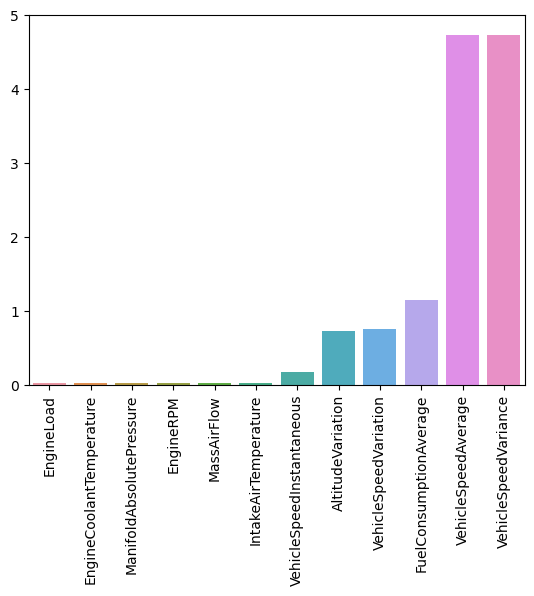

In [9]:
#visualise the features with NaN 

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,5) #maximum % limit to 5%

All features with NaNs do not exceed 5% of all records

### 3 Feature engineering 

In [10]:
#show all records with < 1% NaNs

percent_nan[percent_nan< 1]

EngineLoad                   0.020034
EngineCoolantTemperature     0.020034
ManifoldAbsolutePressure     0.020034
EngineRPM                    0.020034
MassAirFlow                  0.020034
IntakeAirTemperature         0.020034
VehicleSpeedInstantaneous    0.176303
AltitudeVariation            0.721241
VehicleSpeedVariation        0.753296
dtype: float64

Inspect the features with the same % NaNs to see if they are the same row. The features are:

- EngineLoad
- EngineCoolantTemperature
- ManifoldAbsolutePressure
- EngineRPM
- MassAirFlow
- IntakeAirTemperature

In [11]:
#check how many rows for EngineLoad have data missing

combined[combined['EngineLoad'].isnull()]

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
5916,0.199996948,0,13.78982998,90.42506014,0,0.8626,NaN,NaN,NaN,NaN,NaN,NaN,-0.9058,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,peugeot,3
8549,-0.300003052,NaN,15.31525367,80.25958504,0,0.8187,NaN,NaN,NaN,NaN,NaN,NaN,-0.7979,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,peugeot,3
8550,0.099998474,0,14.91864351,83.01670918,0,0.9051,NaN,NaN,NaN,NaN,NaN,NaN,-0.8546,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,peugeot,3
8551,0,0,14.52203335,85.45380996,0,0.9423,NaN,NaN,NaN,NaN,NaN,NaN,-0.9309,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,peugeot,3
8552,-0.400001526,0,14.14067742,87.84451672,0,0.9089,NaN,NaN,NaN,NaN,NaN,NaN,-0.9132,NaN,UnevenCondition,LowCongestionCondition,EvenPaceStyle,peugeot,3


In [12]:
#check if the EngineCoolantTemperature has the same NaN rows as EngineLoad

combined[combined['EngineLoad'].isnull()]['EngineCoolantTemperature']

5916   NaN
8549   NaN
8550   NaN
8551   NaN
8552   NaN
Name: EngineCoolantTemperature, dtype: float64

You can see the row number match

In [13]:
#check if the ManifoldAbsolutePressure has the same NaN rows as EngineLoad

combined[combined['EngineLoad'].isnull()]['ManifoldAbsolutePressure']

5916   NaN
8549   NaN
8550   NaN
8551   NaN
8552   NaN
Name: ManifoldAbsolutePressure, dtype: float64

Again you can see the row numbers match. This will be further validate for the remaining features being check:

- EngineRPM
- MassAirFlow
- AirIntakeTemperature

In [14]:
#check if the EngineRPM has the same NaN rows as EngineLoad

combined[combined['EngineLoad'].isnull()]['EngineRPM']

5916    NaN
8549    NaN
8550    NaN
8551    NaN
8552    NaN
Name: EngineRPM, dtype: object

In [15]:
#check if the MassAirFlow has the same NaN rows as EngineLoad

combined[combined['EngineLoad'].isnull()]['MassAirFlow']

5916    NaN
8549    NaN
8550    NaN
8551    NaN
8552    NaN
Name: MassAirFlow, dtype: object

In [16]:
#check if the IntakeAirTemperature has the same NaN rows as EngineLoad

combined[combined['EngineLoad'].isnull()]['IntakeAirTemperature']

5916   NaN
8549   NaN
8550   NaN
8551   NaN
8552   NaN
Name: IntakeAirTemperature, dtype: float64

We have confirmation the following features with NaNs have matching rows:
- EngineLoad
- EngineeCoolantTemperature
- ManifoldAbsolutePressure
- EngineRPM
- MassAirFlow
- IntakeAirTemperature

This equates to 5 rows, (5916, 8549,8550,8551, & 8552) out of 24957 records, in % terms is 0.02% of records, therefore I recommend removing these records from dataset since they are low quantity

In [17]:
#remove NaN rows for the features above

combined = combined.dropna(axis=0,subset=['EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature'])

#check NaNs after drop above

combined.isna().sum()

AltitudeVariation             180
VehicleSpeedInstantaneous      43
VehicleSpeedAverage          1182
VehicleSpeedVariance         1182
VehicleSpeedVariation         188
LongitudinalAcceleration        0
EngineLoad                      0
EngineCoolantTemperature        0
ManifoldAbsolutePressure        0
EngineRPM                       0
MassAirFlow                     0
IntakeAirTemperature            0
VerticalAcceleration            0
FuelConsumptionAverage        281
roadSurface                     0
traffic                         0
drivingStyle                    0
Car                             0
Journey                         0
dtype: int64

In [18]:
#run function again after NaNs removed

percent_nan = percent_missing(combined)

#check the number of features with < 5% 

percent_nan[percent_nan < 5]

VehicleSpeedInstantaneous    0.172331
AltitudeVariation            0.721385
VehicleSpeedVariation        0.753447
FuelConsumptionAverage       1.126162
VehicleSpeedAverage          4.737095
VehicleSpeedVariance         4.737095
dtype: float64

(0.0, 1.0)

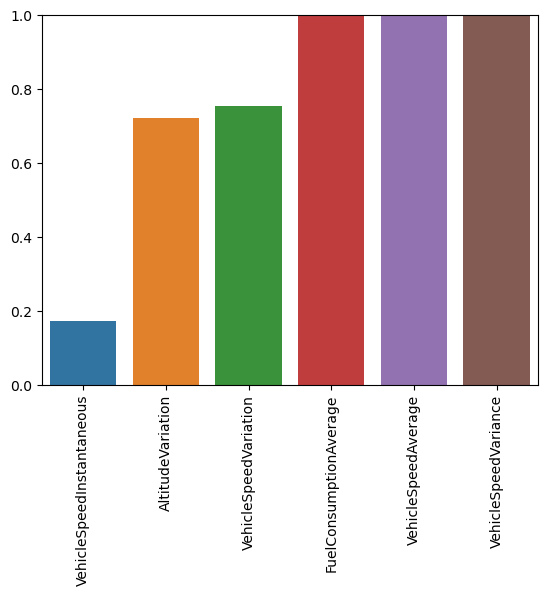

In [19]:
#review graphically the remaining features with NaNs with 1% NaNs

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1) #1% or less is 3 features

We will focus on the features with less than 1% NaNs and see how to deal with them

In [20]:
#carry out row check for the remaining features less than 1% of records with NaNs for VehicleSpeedInstanteous

combined[combined['VehicleSpeedInstantaneous'].isnull()]

#there are 43 rows containing NaNs for VehicleSpeedInstanteous

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
2,NaN,NaN,NaN,NaN,NaN,0.0273,25.88235283,64.0,100.0,800,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
3,NaN,NaN,NaN,NaN,NaN,0.0391,25.88235283,64.0,100.0,798,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
1167,-28.6000366,NaN,NaN,NaN,NaN,-0.113,36.86274719,38.0,98.0,862,8.5,20.0,-0.0039,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
1168,-38.7000122,NaN,NaN,NaN,NaN,-0.141,38.03921509,38.0,98.0,860,8.590000153,20.0,0.0078,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
2474,NaN,NaN,NaN,NaN,NaN,-0.0039,25.88235283,65.0,99.0,797,7.579999924,31.0,0.0078,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
4738,-14.7999878,NaN,NaN,NaN,-4.503600121,-0.3594,52.94117737,78.0,107.0,1732,15.28999996,38.0,0.2109,61.09560394,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
4739,-35.3999634,NaN,NaN,NaN,0,-0.5312,58.4313736,79.0,109.0,1135,11.97999954,35.0,0.207,48.4005127,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
871,NaN,NaN,NaN,NaN,NaN,-0.0273,40,35.0,99.0,856,9.180000305,19.0,0.0117,114.5074081,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,2
872,NaN,NaN,NaN,NaN,NaN,-0.0195,29.41176605,35.0,99.0,890,8.880000114,20.0,0.0156,114.5074081,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,2
873,NaN,NaN,NaN,NaN,NaN,0.0079,43.13725662,35.0,99.0,871,8.789999962,20.0,0,114.5074081,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,2


Using the previous analysis method, we will compare if VehicleSpeedInstantaneous has matching NaNs with the other two features with < 1% Nans:

- AltitudeVariation
- VehicleSpeedVariation

In [21]:
# In this case we will compare VehicleSpeedInstanteous against the AltitudeVariation feature 

combined[combined['VehicleSpeedInstantaneous'].isnull()]['AltitudeVariation']


2                NaN
3                NaN
1167     -28.6000366
1168     -38.7000122
2474             NaN
4738     -14.7999878
4739     -35.3999634
871              NaN
872              NaN
873              NaN
874              NaN
1546             NaN
1547             NaN
2225             NaN
2226             NaN
1038             NaN
1039             NaN
1368     1.200004578
1369     2.300003052
2822             NaN
2823             NaN
6870             NaN
6871             NaN
0                NaN
1                NaN
2597     0.100006104
2598               0
2739             NaN
2740             NaN
2741             NaN
2742             NaN
2743             NaN
2744             NaN
2745             NaN
2746             NaN
2747             NaN
2748               0
2749               0
2750    -9.499996185
2803    -0.099998474
2804               0
4272     1.600002289
4273     0.900001526
Name: AltitudeVariation, dtype: object

A number of rows (15) contain values for AltitudeVariation.  Some values contain '0' values so I propose using 0 to replace the NaNs for AltitudeVariation.  

In [22]:
# compare if VehicleSpeedInstantaneous has matching NaNs for VehicleSpeedVariation 

combined[combined['VehicleSpeedInstantaneous'].isnull()]['VehicleSpeedVariation']

2                NaN
3                NaN
1167             NaN
1168             NaN
2474             NaN
4738    -4.503600121
4739               0
871              NaN
872              NaN
873              NaN
874              NaN
1546             NaN
1547             NaN
2225             NaN
2226             NaN
1038             NaN
1039             NaN
1368          -103.5
1369               0
2822             NaN
2823             NaN
6870             NaN
6871             NaN
0                NaN
1                NaN
2597    -5.399999619
2598               0
2739             NaN
2740             NaN
2741             NaN
2742             NaN
2743             NaN
2744             NaN
2745             NaN
2746             NaN
2747             NaN
2748             NaN
2749             NaN
2750             NaN
2803    -5.399999619
2804               0
4272    -31.07281685
4273               0
Name: VehicleSpeedVariation, dtype: object

A number of rows (10) contain values for VehicleSpeedVariation.

Some values contain '0' values so I propose using 0 to replace the NaNs for VehicleSpeedInstanteous, the zero value could be interpreted that the vehicle was not moving. 

In terms of domain knowledge/feature logic, I will compare VehicleSpeedInstantaneous against the VehicleSpeedAverage. If the car was not moving NaNs could have been recorded for VehicleSpeedInstantaneous. The following code will check for this.

In [23]:
# Compare NaNs for VehicleSpeedInstantaneous v NaNs for VehicleSpeedAverage to prove if the car was moving when NaNs
# were recorded for VehicleSpeedInstantaneous

combined[combined['VehicleSpeedInstantaneous'].isnull()]['VehicleSpeedAverage']

2               NaN
3               NaN
1167            NaN
1168            NaN
2474            NaN
4738            NaN
4739            NaN
871             NaN
872             NaN
873             NaN
874             NaN
1546            NaN
1547            NaN
2225            NaN
2226            NaN
1038            NaN
1039            NaN
1368    106.7644042
1369    106.8672388
2822            NaN
2823            NaN
6870            NaN
6871            NaN
0               NaN
1               NaN
2597    15.57856123
2598    15.29613116
2739            NaN
2740            NaN
2741            NaN
2742            NaN
2743            NaN
2744            NaN
2745            NaN
2746            NaN
2747            NaN
2748            NaN
2749            NaN
2750            NaN
2803    18.61883574
2804    18.48031971
4272    42.73372518
4273    42.41124163
Name: VehicleSpeedAverage, dtype: object

8 rows contain values for VehicleSpeedAverage when VehicleSpeedInstantaneous was NaN. Therefore I propose setting these VehicleSpeenInstaneous values to 0 rather than remove the entire row from the dataset.

In [24]:
#Compare AltitudeVariation & VehicleSpeedVariation for NaN patterns

combined[combined['AltitudeVariation'].isnull()]['VehicleSpeedVariation']

#so it appears that there is a correlation between NaNs for AltitudeVariation & VehicleSpeedVariation

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3646    NaN
3647    NaN
3648    NaN
3649    NaN
3650    NaN
Name: VehicleSpeedVariation, Length: 180, dtype: object

Rather than remove the AltitudeVariation rows with NaN. I propose we replace NaN with 0. The assumption is if there is no altitude change no value is recorded.

So the NaNs for AltitudeVariation, VehicleSpeedVariation, and VehicleSpeedInstantaneous will be replace with 0 values.

In [25]:
# Numeric columns --> fillna with 0

replace_with_zero = ['AltitudeVariation','VehicleSpeedVariation','VehicleSpeedInstantaneous']

combined.loc[:, replace_with_zero] = combined.loc[:, replace_with_zero].fillna(0)

(0.0, 5.0)

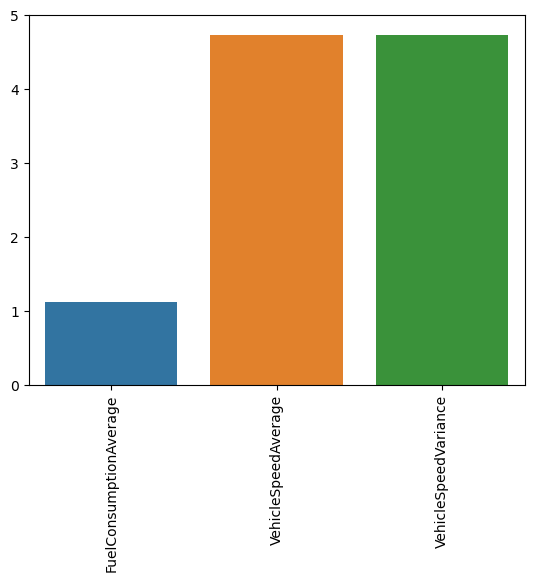

In [26]:
#check if how many NaNs remain after the zero applied

percent_nan = percent_missing(combined)

#plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,5)

Now we will process the remaining three features containing NaNs

In [27]:
#assess the FuelConsumptionAverage feature
combined[combined['FuelConsumptionAverage'].isnull()]

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle,Car,Journey
0,0,0,NaN,NaN,0,0.0156,25.49019623,64.0,100.0,801,7.849999905,22.0,-0.0078,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
1,0,0,NaN,NaN,0,0.0156,25.49019623,64.0,100.0,803,7.889999866,22.0,-0.0156,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
2,0,0,NaN,NaN,0,0.0273,25.88235283,64.0,100.0,800,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
3,0,0,NaN,NaN,0,0.0391,25.88235283,64.0,100.0,798,7.769999981,22.0,-0.0273,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
4,0,0,NaN,NaN,0,0.0469,25.88235283,65.0,100.0,798,7.940000057,22.0,-0.0312,NaN,SmoothCondition,LowCongestionCondition,EvenPaceStyle,opel,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,0.400001526,0,NaN,NaN,0,-0.1769,49.41176605,14.0,102.0,"848,5",7.019999981,12.0,-0.025,NaN,UnevenCondition,NormalCongestionCondition,EvenPaceStyle,peugeot,4
3652,0.199996948,0,NaN,NaN,0,-0.1914,48.23529434,14.0,102.0,841,6.860000134,12.0,-0.0016,NaN,UnevenCondition,NormalCongestionCondition,EvenPaceStyle,peugeot,4
3653,0,0,NaN,NaN,0,-0.2114,49.41176605,14.0,102.0,844,6.940000057,12.0,0.0193,NaN,UnevenCondition,NormalCongestionCondition,EvenPaceStyle,peugeot,4
3654,0,0,NaN,NaN,0,-0.2393,49.01960754,14.0,102.0,"846,5",6.909999847,12.0,0.0752,NaN,UnevenCondition,NormalCongestionCondition,EvenPaceStyle,peugeot,4


In [28]:
#assess the NaNs for the FuelConsumptionAverage feature against the VehicleSpeedAverage NaNs

combined[combined['FuelConsumptionAverage'].isnull()]['VehicleSpeedAverage']
#if there is no fuel consumed values and no values for vehicle Speed average, I propose that the vehicle was not in use and these rows
#can be removed

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3651    NaN
3652    NaN
3653    NaN
3654    NaN
3655    NaN
Name: VehicleSpeedAverage, Length: 281, dtype: object

In [29]:
#removing the features with NaNs based on the above code results  (281 rows)
combined = combined.dropna(axis=0,subset=['FuelConsumptionAverage','VehicleSpeedAverage'])

In [30]:
#check if how many NaNs remain after the NaNs removed

percent_nan = percent_missing(combined)
percent_nan

Series([], dtype: float64)

In [31]:
#final check if there any remaining NaNs

combined.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
Car                          0
Journey                      0
dtype: int64

In [32]:
#reset the dataframe index

combined= combined.reset_index(drop=True)


combined.shape

(23770, 19)

 ### 4 Decide on what attribute will be analysed

The project team agreed to focus on driving style attribute, the other attributes will be removed from the dataset. There are two possible attribute outcomes for driving style, even paced style and aggressive style. 

In [33]:
#Next step is remove the labelled outputs "traffic" and "roadSurface" as we are focusing on the output labelled 'drivingStyle'

combined = combined.drop(columns=['traffic','roadSurface'])

In [34]:
#check dataset parameters after removal of traffic and road surface attributes

combined.shape

(23770, 17)

In [35]:
# One final check for NaNs 

combined.isna().sum()

AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
drivingStyle                 0
Car                          0
Journey                      0
dtype: int64

### 5 Set the final cleaned dataset with the required features and target values

The final dataset after data wrangling is called 'combined'

Summary of data wrangling steps:

- 1 Import the datasets into a Jupyter Notebook (24957 rows × 19 columns)
- 2 Check for missing values (3092)
- 3 Feature engineering (< 5% of rows contained NaN values, rows containing NaNs either removed or values replaced with 0)
- 4 Decide on what attribute will be analysed (drivingStyle was selected by project team)
- 5 Set the final cleaned dataset with the required features and target values (23770 rows, 17 columns)

A total of 17 features include target values with data wrangled into the final dataset.